# 1.Tokenization

## 1.1.White space


In [1]:
# import WhitespaceTokenizer() method from nltk
from nltk.tokenize import WhitespaceTokenizer

# Create a reference variable for Class WhitespaceTokenizer
tk = WhitespaceTokenizer()

# Create a string input
gfg = "Amazone \nis\t one of the    best \t\t website in the world\n."

# Use tokenize method
out = tk.tokenize(gfg)

print(out)


/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['Amazone', 'is', 'one', 'of', 'the', 'best', 'website', 'in', 'the', 'world', '.']


In [2]:
# Create a string input
gfg = "The price\t of burger \nin Burger King is Rs.36.\n"

# Use tokenize method
print(tk.tokenize(gfg))

['The', 'price', 'of', 'burger', 'in', 'Burger', 'King', 'is', 'Rs.36.']


Ưu điểm: loại bỏ được tab, line break.

Nhưng có thể Burger-King nên được gộp thành 1 token thì sao?

## 1.2.Rule-based (RegEx)



In [3]:
# 1st way
text = "The quick brown fox jumps over the lazy dog."
tokens = text.split()
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']


In [4]:
# 2nd way

import re
text = "Hello, I am working at Big-Four-Company and my email is pawangunjan23@netflix.com."

#Define the regular expression pattern
p='([\w]+-[\w]+-[\w]+)|([\w\.-]+@[\w]+.[\w]+)'

# Find matches
matches = re.findall(p, text)
# print output
for match in matches:
	if match[0]:
		print(f"Company Name: {match[0]}")
	else:
		print(f"Email address: {match[1]}")


Company Name: Big-Four-Company
Email address: pawangunjan23@netflix.com


In [5]:
import re

text = "Hello Friend! How can I help you?"

# Define the regular expression pattern matches one or more non-alphanumeric characters
pattern = r'\W+'

# Remove the punctuation and get the resulting string
result = re.sub(pattern, ' ', text)

# tokenize
tokens = re.findall(r'\b\w+\b|[^\w\s]', result)

# Print the result
print(tokens)


['Hello', 'Friend', 'How', 'can', 'I', 'help', 'you']


Ưu điểm: Tốt hơn white space, nhưng khó viết code hơn vì nó phức tạp.

Ngoài ra thì với những trường hợp khó viết như https, email thì sẽ khó lấy.

## 1.3.TextBlob

là một thư viện Python và cung cấp một API đơn giản để truy cập các hàm và thực hiện các tác vụ NLP cơ bản. Nó được xây dựng trên mô-đun NLTK.

In [6]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [7]:
# from textblob lib. import TextBlob method
from textblob import TextBlob

text = ("Natural language processing (NLP) is a field " +
	"of computer science, artificial intelligence " +
	"and computational linguistics concerned with " +
	"the interactions between computers and human " +
	"(natural) languages, and, in particular, " +
	"concerned with programming computers to " +
	"fruitfully process large natural language " +
	"corpora. Challenges in natural language " +
	"processing frequently involve natural " +
	"language understanding, natural language" +
	"generation frequently from formal, machine" +
	"-readable logical forms), connecting language " +
	"and machine perception, managing human-" +
	"computer dialog systems, or some combination " +
	"thereof.")

# create a TextBlob object
blob_object = TextBlob(text)

# tokenize paragraph into words.
print(" Word Tokenize :\n", blob_object.words)

# tokenize paragraph into sentences.
print("\n Sentence Tokenize :\n", blob_object.sentences)


 Word Tokenize :
 ['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'field', 'of', 'computer', 'science', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'and', 'in', 'particular', 'concerned', 'with', 'programming', 'computers', 'to', 'fruitfully', 'process', 'large', 'natural', 'language', 'corpora', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'natural', 'language', 'understanding', 'natural', 'languagegeneration', 'frequently', 'from', 'formal', 'machine-readable', 'logical', 'forms', 'connecting', 'language', 'and', 'machine', 'perception', 'managing', 'human-computer', 'dialog', 'systems', 'or', 'some', 'combination', 'thereof']

 Sentence Tokenize :
 [Sentence("Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions

## 1.4.spacy

là một Thư viện hướng đối tượng được sử dụng để xử lý trước văn bản và câu cũng như trích xuất thông tin từ văn bản bằng cách sử dụng các mô-đun và hàm.

In [8]:
# First we need to import spacy
import spacy

text = """Machine learning (ML) is a field of study in artificial intelligence concerned with the development
and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform
tasks without explicit instructions.[1]"""

# Creating blank language object then tokenizing words of the sentence
nlp = spacy.blank("en")

doc = nlp(text)

for token in doc:
	print(token)


Machine
learning
(
ML
)
is
a
field
of
study
in
artificial
intelligence
concerned
with
the
development


and
study
of
statistical
algorithms
that
can
learn
from
data
and
generalize
to
unseen
data
,
and
thus
perform


tasks
without
explicit
instructions.[1
]


## 1.5.Dictionary-based

 Chia văn bản thành các token riêng lẻ dựa trên từ điển được xác định trước gồm các biểu thức nhiều từ. Điều này hữu ích khi các kỹ thuật token từ tiêu chuẩn có thể không đủ cho một số ứng dụng nhất định, chẳng hạn như phân tích cảm tính hoặc nhận dạng thực thể được đặt tên, trong đó các biểu thức nhiều từ cần được coi là một token duy nhất.

In [9]:
# import the necessary libraries
from nltk import word_tokenize
from nltk.tokenize import MWETokenizer

# customn dictionary
dictionary = [("Jammu", "Kashmir"),
			("Pawan", "Kumar", "Gunjan"),
			("Himachal", "Pradesh")]

# Create an instance of MWETokenizer with the dictionary
dicter = MWETokenizer(dictionary, separator=' ')

# Text
text = """
Jammu Kashmir is an integral part of India.
My name is Pawan Kumar Gunjan.
He is from Himachal Pradesh.
"""

tokens = word_tokenize(text)
print('General Word Tokenization \n',tokens)

dict_tokens =dicter.tokenize(tokens)
print('Dictionary based tokenization \n', dict_tokens)


General Word Tokenization 
 ['Jammu', 'Kashmir', 'is', 'an', 'integral', 'part', 'of', 'India', '.', 'My', 'name', 'is', 'Pawan', 'Kumar', 'Gunjan', '.', 'He', 'is', 'from', 'Himachal', 'Pradesh', '.']
Dictionary based tokenization 
 ['Jammu Kashmir', 'is', 'an', 'integral', 'part', 'of', 'India', '.', 'My', 'name', 'is', 'Pawan Kumar Gunjan', '.', 'He', 'is', 'from', 'Himachal Pradesh', '.']


## 1.6.nltk


In [10]:
# import the existing word and sentence tokenizing libraries
from nltk.tokenize import sent_tokenize, word_tokenize

text = """Machine learning (ML) is a field of study in artificial intelligence concerned with the development
and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform
tasks without explicit instructions.[1]"""

print(sent_tokenize(text))
print(word_tokenize(text))


['Machine learning (ML) is a field of study in artificial intelligence concerned with the development\nand study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform\ntasks without explicit instructions.', '[1]']
['Machine', 'learning', '(', 'ML', ')', 'is', 'a', 'field', 'of', 'study', 'in', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'development', 'and', 'study', 'of', 'statistical', 'algorithms', 'that', 'can', 'learn', 'from', 'data', 'and', 'generalize', 'to', 'unseen', 'data', ',', 'and', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', '.', '[', '1', ']']


### 1.6.1 TreebankWordTokenizer


In [11]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(text)


['Machine',
 'learning',
 '(',
 'ML',
 ')',
 'is',
 'a',
 'field',
 'of',
 'study',
 'in',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'development',
 'and',
 'study',
 'of',
 'statistical',
 'algorithms',
 'that',
 'can',
 'learn',
 'from',
 'data',
 'and',
 'generalize',
 'to',
 'unseen',
 'data',
 ',',
 'and',
 'thus',
 'perform',
 'tasks',
 'without',
 'explicit',
 'instructions.',
 '[',
 '1',
 ']']

### 1.6.2 WordPunctTokenizer

In [12]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
tokenizer.tokenize(text)


['Machine',
 'learning',
 '(',
 'ML',
 ')',
 'is',
 'a',
 'field',
 'of',
 'study',
 'in',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'development',
 'and',
 'study',
 'of',
 'statistical',
 'algorithms',
 'that',
 'can',
 'learn',
 'from',
 'data',
 'and',
 'generalize',
 'to',
 'unseen',
 'data',
 ',',
 'and',
 'thus',
 'perform',
 'tasks',
 'without',
 'explicit',
 'instructions',
 '.[',
 '1',
 ']']

**Nhận xét:**

+ Token không nắm bắt được ý nghĩa của câu ==> Dẫn đến mơ hồ.

+ Một số ngôn ngữ như tiếng Trung, tiếng Nhật, tiếng Ả Rập, thiếu khoảng cách rõ ràng giữa các từ. Do đó, không có ranh giới rõ ràng làm phức tạp quá trình mã hóa.

+ Văn bản cũng có thể bao gồm nhiều từ, chẳng hạn như địa chỉ email, URL và các ký hiệu đặc biệt, do đó rất khó để quyết định cách mã hóa các phần tử đó.


# 2.Stemming

là một phương pháp xử lý văn bản loại bỏ tiền tố và hậu tố trong từ, chuyển chúng về dạng cơ bản hoặc dạng gốc. Mục tiêu chính của Stemming là hợp lý hóa và chuẩn hóa các từ, nâng cao hiệu quả của các tác vụ xử lý ngôn ngữ tự nhiên.

---

Stemming trong NLP sẽ giảm các từ về dạng cơ sở hoặc gốc của chúng, hỗ trợ chuẩn hóa văn bản để xử lý dễ dàng hơn. Kỹ thuật này rất quan trọng trong các nhiệm vụ như phân loại văn bản, truy xuất thông tin và tóm tắt văn bản. Mặc dù có lợi nhưng việc rút gốc có những hạn chế, bao gồm các tác động tiềm ẩn đến khả năng đọc văn bản và đôi khi không chính xác trong việc xác định dạng gốc chính xác của một từ.



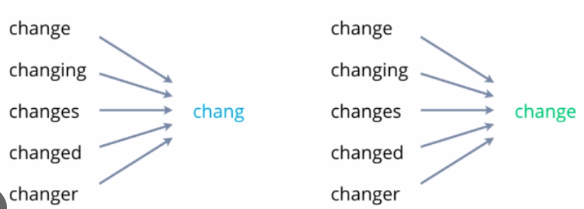

## 2.1.Porter’s Stemmer

PP lâu đời nhất từ 1980. Dựa trên ý tưởng hậu tố trong tiếng Anh.

**Ưu điểm**: Nó tạo từ gốc tốt nhất so với các loại Stemmer khác và có tỷ lệ lỗi ít hơn.

**Hạn chế**: Các từ gốc được tạo ra không phải lúc nào cũng là từ có thật.


In [13]:
from nltk.stem import PorterStemmer

# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()

# Example words for stemming
words = ["running", "jumps", "happily", "running", "happily"]

# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]

# Print the results
print("Original words:", words)
print("Stemmed words:", stemmed_words)


Original words: ['running', 'jumps', 'happily', 'running', 'happily']
Stemmed words: ['run', 'jump', 'happili', 'run', 'happili']


## 2.2.Snowball Stemmer

Snowball Stemmer có thể nói là cải tiến của Porter Stemmer, là đa ngôn ngữ vì nó có thể xử lý các từ không phải tiếng Anh. Nó hỗ trợ nhiều ngôn ngữ khác nhau và dựa trên ngôn ngữ lập trình ‘Snowball’, được biết đến với khả năng xử lý hiệu quả các chuỗi nhỏ.

---

Snowball Stemmer chặt chẽ hơn nhiều so với Porter Stemmer và còn được gọi là Porter2 Stemmer. Nhờ những cải tiến được bổ sung khi so sánh với Porter Stemmer, Snowball Stemmer có tốc độ tính toán cao hơn.

In [14]:
from nltk.stem import SnowballStemmer

# Choose a language for stemming, for example, English
stemmer = SnowballStemmer(language='english')

# Example words to stem
words_to_stem = ['running', 'jumped', 'happily', 'quickly', 'foxes']

# Apply Snowball Stemmer
stemmed_words = [stemmer.stem(word) for word in words_to_stem]

# Print the results
print("Original words:", words_to_stem)
print("Stemmed words:", stemmed_words)


Original words: ['running', 'jumped', 'happily', 'quickly', 'foxes']
Stemmed words: ['run', 'jump', 'happili', 'quick', 'fox']


## 2.3.Lancaster Stemmer

là phương pháp mạnh mẽ và năng động hơn so với 2 pp bên trên. Lancaster Stemmer thực sự nhanh hơn, nhưng thuật toán thực sự khó hiểu khi xử lý các từ nhỏ. Nhưng chúng không hiệu quả bằng Snowball Stemmers. Lancaster Stemmer lưu các quy tắc từ bên ngoài và về cơ bản sử dụng thuật toán lặp.

In [15]:
from nltk.stem import LancasterStemmer

# Create a Lancaster Stemmer instance
stemmer = LancasterStemmer()

# Example words to stem
words_to_stem = ['running', 'jumped', 'happily', 'quickly', 'foxes']

# Apply Lancaster Stemmer
stemmed_words = [stemmer.stem(word) for word in words_to_stem]

# Print the results
print("Original words:", words_to_stem)
print("Stemmed words:", stemmed_words)


Original words: ['running', 'jumped', 'happily', 'quickly', 'foxes']
Stemmed words: ['run', 'jump', 'happy', 'quick', 'fox']


## 2.4.Notes

***Ứng dụng của Stemming***:
+ được sử dụng trong các hệ thống truy xuất thông tin như công cụ tìm kiếm.
+ Nó được sử dụng để xác định từ vựng lĩnh vực trong domain analysis.
+ Để hiển thị kết quả tìm kiếm bằng cách lập chỉ mục trong khi tài liệu đang phát triển thành các con số và để ánh xạ tài liệu đến các chủ đề chung bằng cách stemming.
+ Phân tích cảm xúc, xem xét các đánh giá và bình luận được đưa ra bởi nhiều người dùng khác nhau về bất cứ điều gì, thường được sử dụng cho phân tích sản phẩm, chẳng hạn như cho các cửa hàng bán lẻ trực tuyến. Trước khi nó được diễn giải, stemming được chấp nhận dưới dạng phương tiện chuẩn bị văn bản.
+ Một phương pháp phân tích nhóm được sử dụng trên các tài liệu văn bản được gọi là phân cụm tài liệu (còn được gọi là phân cụm văn bản). Các ứng dụng quan trọng của nó bao gồm trích xuất chủ đề, cấu trúc tự động tài liệu, và truy xuất thông tin nhanh chóng.

---


***Nhược điểm của Stemming***

+ **Over-stemming:** xảy ra khi một stemmer tạo ra các hình thức gốc không chính xác hoặc các từ không hợp lệ. Điều này có thể dẫn đến mất ý nghĩa và dễ đọc. Ví dụ, “arguing” có thể được stemming thành “argu,” mất đi ý nghĩa. Để giải quyết vấn đề này, lựa chọn một stemmer phù hợp, thử nghiệm trên văn bản mẫu hoặc sử dụng lemmatization có thể giảm thiểu các vấn đề quá stemming. Các kỹ thuật như gán vai trò ngữ nghĩa và phân tích cảm xúc có thể tăng cường nhận thức ngữ cảnh trong stemming.

+ **Under-stemming:** xảy ra khi một stemmer không tạo ra các hình thức gốc chính xác hoặc không giảm từ xuống hình thức cơ bản của chúng. Điều này có thể dẫn đến mất thông tin và cản trở phân tích văn bản. Ví dụ, stemming “arguing” và “argument” thành “argu” có thể mất đi ý nghĩa. Để giảm thiểu không đủ stemming, chọn một stemmer phù hợp, thử nghiệm trên văn bản mẫu hoặc lựa chọn lemmatization có thể có lợi. Các kỹ thuật như gán vai trò ngữ nghĩa và phân tích cảm xúc tăng cường nhận thức ngữ cảnh trong stemming.

---

***Ưu điểm của Stemming***
Stemming trong xử lý ngôn ngữ tự nhiên mang lại những lợi ích như chuẩn hóa văn bản, đơn giản hóa các biến thể từ thành một hình thức cơ bản chung. Nó hỗ trợ trong truy xuất thông tin, khai thác văn bản, và giảm kích thước đặc trưng trong học máy. Stemming nâng cao hiệu quả tính toán, làm cho nó trở thành một bước quan trọng trong tiền xử lý văn bản cho các ứng dụng NLP khác nhau.

# 3.Lenmatization


Ngược lại với stemming, lemmatization mạnh mẽ hơn nhiều. Nó không chỉ dừng lại ở việc giảm từ mà còn xem xét toàn bộ từ vựng của một ngôn ngữ để áp dụng phân tích hình thái cho các từ, nhằm loại bỏ chỉ các hậu tố biến cách và trả về dạng gốc hoặc dạng từ điển của từ, được gọi là lemma.

---

Điều quan trọng cần lưu ý là Stemming khác với Lemmatization. Lemmatization là quá trình rút gọn một từ về dạng cơ sở của nó, nhưng không giống như từ gốc, nó tính đến ngữ cảnh của từ và tạo ra một từ hợp lệ, không giống như từ gốc có thể tạo ra một dạng không phải từ làm dạng gốc.


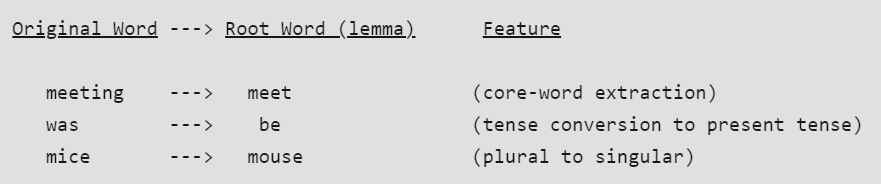

## 2.1.Wordnet Lemmatizer  

Wordnet là một cơ sở dữ liệu từ vựng công khai có sẵn trên 200 ngôn ngữ, cung cấp các mối quan hệ ngữ nghĩa giữa các từ của nó. Đây là một trong những kỹ thuật lemmatizer sớm nhất và được sử dụng phổ biến nhất.

+ Nó có sẵn trong thư viện nltk của Python.

+ Wordnet liên kết các từ theo các mối quan hệ ngữ nghĩa (ví dụ: từ đồng nghĩa).

+ Nó nhóm các từ đồng nghĩa dưới dạng synsets.

+ Synsets: một nhóm các phần tử dữ liệu tương đương về ngữ nghĩa.

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling', 'driving', 'died', 'tried', 'feet']
for words in list1:
	print(words + " ---> " + wnl.lemmatize(words))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


kites ---> kite
babies ---> baby
dogs ---> dog
flying ---> flying
smiling ---> smiling
driving ---> driving
died ---> died
tried ---> tried
feet ---> foot


In [17]:
# sentence lemmatization
string = 'the cat is sitting with the bats on the striped mat under many flying geese'

# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)

lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
print(lemmatized_string)

['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on', 'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
the cat is sitting with the bat on the striped mat under many flying goose


**Notes**: Một vài từ như sitting, striped, flying vẫn giữ nguyên dạng vì nó bị xem như là Danh Từ, thay vì Động Từ. Do vậy có thể sử dụng stemming kết hợp, hoặc sử dụng WordNet với POS (Part of Speech) tags.

## 2.2.TextBlob


In [18]:
from textblob import TextBlob, Word

my_word = 'cats'

# create a Word object
w = Word(my_word)

print(w.lemmatize())

sentence = 'the bats saw the cats with stripes hanging upside down by their feet.'

s = TextBlob(sentence)
lemmatized_sentence = " ".join([w.lemmatize() for w in s.words])

print(lemmatized_sentence)

cat
the bat saw the cat with stripe hanging upside down by their foot


Tương tự như Wordnet, TextBlob cũng gặp vấn đề tương tự. Lúc này cũng có thể kết hợp với stemming hoặc sử dụng TextBlob POS tags.

In [19]:
from textblob import TextBlob

# Define function to lemmatize each word with its POS tag
def pos_tagger(sentence):
    """POS_TAGGER_FUNCTION : TYPE 2"""
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

# Lemmatize
sentence = "the bats saw the cats with stripes hanging upside down by their feet"
lemma_list = pos_tagger(sentence)
lemmatized_sentence = " ".join(lemma_list)
print(lemmatized_sentence)

t_blob = TextBlob(sentence)
lemmatized_sentence = " ".join([w.lemmatize() for w in t_blob.words])
print(lemmatized_sentence)


the bat saw the cat with stripe hang upside down by their foot
the bat saw the cat with stripe hanging upside down by their foot


## 2.3.spaCy



In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'the bats saw the cats with best stripes hanging upside down by their feet')

# Create list of tokens from given string
tokens = [token for token in doc]
print(tokens)

lemmatized_sentence = " ".join([token.lemma_ for token in doc])

print(lemmatized_sentence)

[the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
the bat see the cat with good stripe hang upside down by their foot


+ Ngay cả các danh từ Pro cũng được phát hiện. (được xác định bởi -PRON-)
+ Ngay cả `best` cũng được chuyển thành `good`


# 4.Stopwords removal

Stopwords là một từ thường được sử dụng (chẳng hạn như “the”, “a”, “an” hoặc “in”) mà công cụ tìm kiếm đã được lập trình để bỏ qua, cả khi lập chỉ mục các mục để tìm kiếm và khi truy xuất chúng dưới dạng từ khóa, kết quả của một truy vấn tìm kiếm.

---

Chúng ta không muốn những từ này chiếm dung lượng trong cơ sở dữ liệu hoặc chiếm thời gian xử lý quý giá. ==> có thể loại bỏ chúng một cách dễ dàng bằng cách lưu trữ danh sách các từ mà ta cho là Stopwords.


## 4.1.nltk

In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """This is a sample sentence,
				showing off the stop words filtration."""

sw = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in sw]
filtered_sentence = [w for w in word_tokens if w not in sw]

print(word_tokens)
print(filtered_sentence)


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


## 4.2.spacy

In [23]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "This is a sample sentence, showing off the stop words filtration."

# Process the text using spaCy
doc = nlp(text)

# Remove stopwords
filtered_words = [token.text for token in doc if not token.is_stop]

# Join the filtered words to form a clean text
clean_text = ' '.join(filtered_words)

print("Original Text:", text)
print("Text after Stopword Removal:", clean_text)

Original Text: This is a sample sentence, showing off the stop words filtration.
Text after Stopword Removal: sample sentence , showing stop words filtration .


## 4.3.Scikit-Learn

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
documents = [
    "This is a sample sentence.",
    "Another example sentence to demonstrate stopwords removal.",
    "Sklearn makes text processing easy."
]

# Initialize CountVectorizer with English stopwords
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Get the feature names (words that are not stopwords)
features = vectorizer.get_feature_names_out()

# Transform the documents to lists of words without stopwords
processed_documents = [" ".join(doc) for doc in vectorizer.inverse_transform(X)]

# Print the results
print("Feature Names (Words not considered as stopwords):", features)
print("Processed Documents (with stopwords removed):", processed_documents)

Feature Names (Words not considered as stopwords): ['demonstrate' 'easy' 'example' 'makes' 'processing' 'removal' 'sample'
 'sentence' 'sklearn' 'stopwords' 'text']
Processed Documents (with stopwords removed): ['sample sentence', 'sentence example demonstrate stopwords removal', 'sklearn makes text processing easy']


# 5.Parts of Speech (POS)

Gắn thẻ các phần của lời nói là mỗi từ trong tài liệu được cung cấp một phần cụ thể của lời nói (trạng từ, tính từ, động từ, v.v.) hoặc danh mục ngữ pháp. Thông qua việc bổ sung một lớp thông tin cú pháp và ngữ nghĩa vào các từ, quy trình này giúp ta hiểu cấu trúc và ý nghĩa của câu dễ dàng hơn.

---

Trong các ứng dụng NLP, gắn thẻ POS rất hữu ích cho machine translation, named entity recognition, and information extraction, cùng những bài toán khác. Nó cũng có tác dụng tốt trong việc giải quyết sự mơ hồ về nhiều nghĩa và tiết lộ cấu trúc ngữ pháp của câu.


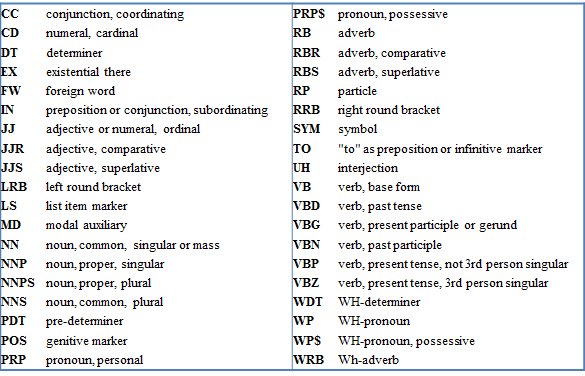

## 5.1.nltk

In [25]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/tripercy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
# Importing the NLTK library
from nltk.tokenize import word_tokenize

# Sample text
text = """William McKnight takes corporate information and turns it into a bottom-line producing asset.
He’s worked with major companies worldwide — 15 of the Global 2000 — and many others. """

# Get list of words
words = word_tokenize(text)

# Performing PoS tagging
pos_tags = nltk.pos_tag(words)

# Displaying the PoS tagged result in separate lines
print("Original Text:")
print(text)

print("\nPoS Tagging Result:")
print(pos_tags)

Original Text:
William McKnight takes corporate information and turns it into a bottom-line producing asset.
He’s worked with major companies worldwide — 15 of the Global 2000 — and many others. 

PoS Tagging Result:
[('William', 'NNP'), ('McKnight', 'NNP'), ('takes', 'VBZ'), ('corporate', 'JJ'), ('information', 'NN'), ('and', 'CC'), ('turns', 'VBZ'), ('it', 'PRP'), ('into', 'IN'), ('a', 'DT'), ('bottom-line', 'JJ'), ('producing', 'VBG'), ('asset', 'NN'), ('.', '.'), ('He', 'PRP'), ('’', 'VBD'), ('s', 'JJ'), ('worked', 'VBN'), ('with', 'IN'), ('major', 'JJ'), ('companies', 'NNS'), ('worldwide', 'VBP'), ('—', 'JJ'), ('15', 'CD'), ('of', 'IN'), ('the', 'DT'), ('Global', 'NNP'), ('2000', 'CD'), ('—', 'NNP'), ('and', 'CC'), ('many', 'JJ'), ('others', 'NNS'), ('.', '.')]


## 5.2.spacy

In [27]:
#importing libraries
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = """William McKnight takes corporate information and turns it into a bottom-line producing asset.
He’s worked with major companies worldwide — 15 of the Global 2000 — and many others. """

# Process the text with SpaCy
doc = nlp(text)

# Display the PoS tagged result
print("Original Text: ", text)
print("PoS Tagging Result:")
for token in doc:
	print(f"{token.text}: {token.pos_}")

Original Text:  William McKnight takes corporate information and turns it into a bottom-line producing asset.
He’s worked with major companies worldwide — 15 of the Global 2000 — and many others. 
PoS Tagging Result:
William: PROPN
McKnight: PROPN
takes: VERB
corporate: ADJ
information: NOUN
and: CCONJ
turns: VERB
it: PRON
into: ADP
a: DET
bottom: ADJ
-: PUNCT
line: NOUN
producing: VERB
asset: NOUN
.: PUNCT

: SPACE
He: PRON
’s: AUX
worked: VERB
with: ADP
major: ADJ
companies: NOUN
worldwide: ADV
—: PUNCT
15: NUM
of: ADP
the: DET
Global: PROPN
2000: NUM
—: PUNCT
and: CCONJ
many: ADJ
others: NOUN
.: PUNCT


## 5.3.TextBlob

In [28]:
# from textblob lib import TextBlob method
from textblob import TextBlob

text = """William McKnight takes corporate information and turns it into a bottom-line producing asset.
He’s worked with major companies worldwide — 15 of the Global 2000 — and many others. """

# create a textblob object
blob_object = TextBlob(text)

# print word with pos tag.
print(blob_object.tags)

[('William', 'NNP'), ('McKnight', 'NNP'), ('takes', 'VBZ'), ('corporate', 'JJ'), ('information', 'NN'), ('and', 'CC'), ('turns', 'VBZ'), ('it', 'PRP'), ('into', 'IN'), ('a', 'DT'), ('bottom-line', 'JJ'), ('producing', 'VBG'), ('asset', 'NN'), ('He', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('worked', 'VBD'), ('with', 'IN'), ('major', 'JJ'), ('companies', 'NNS'), ('worldwide', 'VBP'), ('—', 'JJ'), ('15', 'CD'), ('of', 'IN'), ('the', 'DT'), ('Global', 'NNP'), ('2000', 'CD'), ('—', 'NNP'), ('and', 'CC'), ('many', 'JJ'), ('others', 'NNS')]


## 5.4.Notes



**Ưu điểm của POS Tagging**

- **Đơn giản hóa văn bản:** Việc chia nhỏ các câu phức tạp thành các thành phần cấu thành của chúng giúp cho tài liệu dễ hiểu hơn và dễ dàng đơn giản hóa hơn.
- **Truy xuất thông tin:** Các hệ thống truy xuất thông tin được cải thiện nhờ vào việc gán nhãn từ loại, cho phép lập chỉ mục và tìm kiếm chính xác hơn dựa trên các danh mục ngữ pháp.
- **Nhận diện thực thể tên:** Việc gán nhãn từ loại giúp xác định các thực thể như tên, địa điểm, và tổ chức trong văn bản và là điều kiện tiên quyết cho việc nhận diện thực thể tên.
- **Phân tích cú pháp:** Nó hỗ trợ phân tích cú pháp, giúp với việc phân tích cấu trúc cụm từ và xác định mối liên kết từ.

---

**Nhược điểm POS Tagging**

- **Mơ hồ:** Tính mơ hồ vốn có của ngôn ngữ làm cho việc gán nhãn từ loại trở nên khó khăn vì từ có thể mang ý nghĩa khác nhau tùy theo ngữ cảnh, điều này có thể dẫn đến hiểu lầm.
- **Biểu đạt thành ngữ:** Tiếng lóng, thành ngữ và cụm từ thành ngữ có thể gây vấn đề cho các hệ thống gán nhãn từ loại vì chúng không luôn tuân theo các tiêu chuẩn ngữ pháp chính thức.
- **Từ ngữ ngoài từ vựng:** Các từ ngữ ngoài từ vựng (từ không có trong tập dữ liệu huấn luyện) có thể khó xử lý vì mô hình có thể gặp khó khăn trong việc gán nhãn từ loại chính xác.
- **Phụ thuộc vào lĩnh vực:** Để có kết quả tốt nhất, các mô hình gán nhãn từ loại được huấn luyện trên một lĩnh vực cụ thể cần có nhiều dữ liệu huấn luyện cụ thể cho lĩnh vực đó vì chúng có thể không tổng quát hóa tốt cho các lĩnh vực khác.

# 6.Text Normalization

**Chuẩn hóa văn bản** là phương pháp chuyển đổi văn bản thành một dạng chuẩn mà nó có thể chưa từng có trước đó. Việc chuẩn hóa văn bản trước khi lưu trữ hoặc xử lý cho phép tách biệt các mối quan tâm, bởi vì đầu vào được đảm bảo nhất quán trước khi các thao tác được thực hiện trên đó. Chuẩn hóa văn bản yêu cầu phải nhận thức được loại văn bản cần chuẩn hóa và cách nó sẽ được xử lý sau đó; không có quy trình chuẩn hóa đa mục đích.

---

**Các bước cần thiết**

1. **Chuỗi văn bản đầu vào,**
2. **Chuyển tất cả các chữ cái trong chuỗi về một kiểu (hoặc chữ thường hoặc chữ hoa),**
3. **Nếu số là cần thiết, chuyển đổi số thành chữ, nếu không thì loại bỏ tất cả các số,**
4. **Loại bỏ dấu câu và các hình thức ngữ pháp khác,**
5. **Loại bỏ khoảng trắng,**
6. **Loại bỏ các từ dừng (stop words),**
7. **Và bất kỳ tính toán nào khác.**

In [29]:
# import regex
import re

# download stopwords
import nltk
nltk.download('stopwords')

# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# input string
string = """	 Python 3.0, released in 2008, was a major revision of the language that is not completely backward compatible and much
Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x[30] and later are supported,
with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows)."""

# convert to lower case
lower_string = string.lower()

# remove numbers
no_number_string = re.sub(r'\d+','',lower_string)

# remove all punctuation except words and space
no_punc_string = re.sub(r'[^\w\s]','', no_number_string)

# remove white spaces
no_wspace_string = no_punc_string.strip()

# convert string to list of words
lst_string = [no_wspace_string][0].split()
print(lst_string)

# remove stopwords
no_stpwords = [item for item in lst_string if item not in stop_words]
no_stpwords_string = " ".join(no_stpwords)

# output
print(no_stpwords_string)

['python', 'released', 'in', 'was', 'a', 'major', 'revision', 'of', 'the', 'language', 'that', 'is', 'not', 'completely', 'backward', 'compatible', 'and', 'much', 'python', 'code', 'does', 'not', 'run', 'unmodified', 'on', 'python', 'with', 'python', 's', 'endoflife', 'only', 'python', 'x', 'and', 'later', 'are', 'supported', 'with', 'older', 'versions', 'still', 'supporting', 'eg', 'windows', 'and', 'old', 'installers', 'not', 'restricted', 'to', 'bit', 'windows']
python released major revision language completely backward compatible much python code run unmodified python python endoflife python x later supported older versions still supporting eg windows old installers restricted bit windows


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 7.Text Vectorization

- Để có thể dùng được Machine Learning models, ta cần chuyển dữ liệu dạng text sang dạng vector.

- Vector là dạng số học của từ

- Một số kĩ thuật như:

1) Bag of words

2) TF-IDF

3) Word Embeddings

4) Character Embeddings


## 7.1.Bag of words

- Mô hình này sẽ tạo ra 1 từ điển (cái túi chứa các từ) từ văn bản (data), sau đó đếm số lần xuất hiện của từng từ trong từng câu, và lấy giá trị đếm đó làm features.

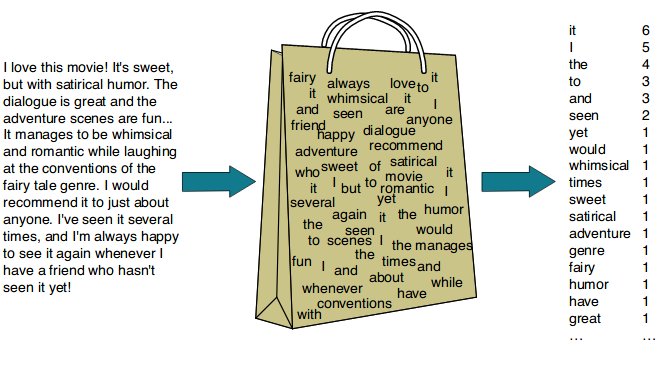

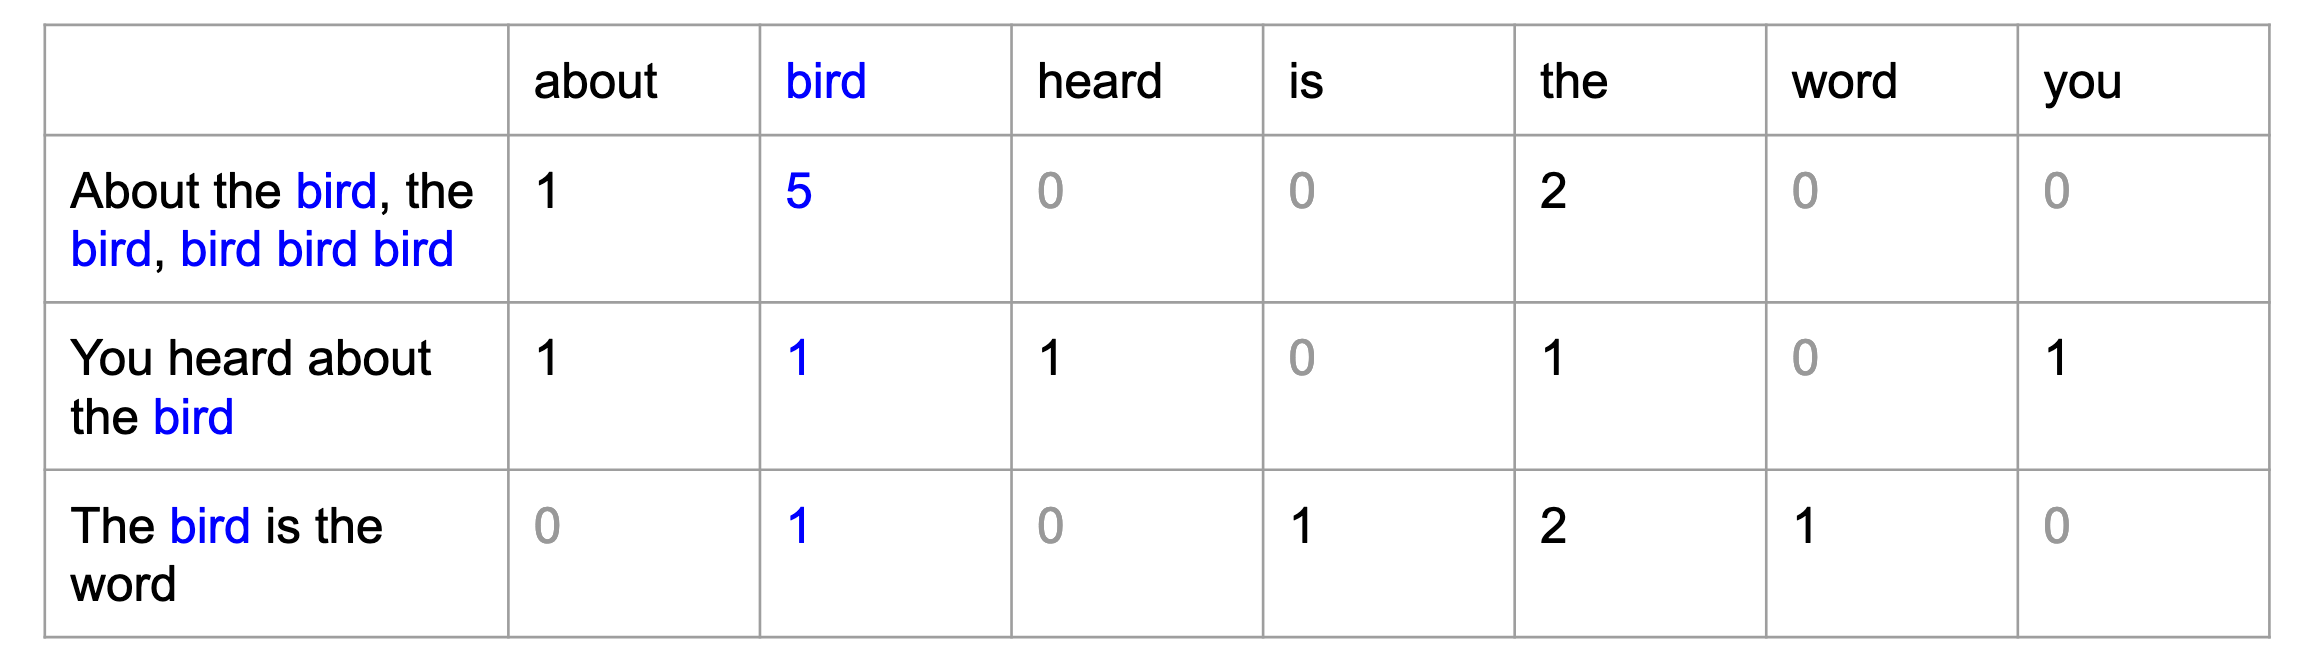

In [30]:
# Ví dụ về bag of words với scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

data = [
    "About the bird, the bird, bird bird bird",
    "You heard about the bird",
    "The bird is the word"
]

vect = CountVectorizer()
features = vect.fit_transform(data)

print(vect.vocabulary_)
print(features.toarray())

{'about': 0, 'the': 4, 'bird': 1, 'you': 6, 'heard': 2, 'is': 3, 'word': 5}
[[1 5 0 0 2 0 0]
 [1 1 1 0 1 0 1]
 [0 1 0 1 2 1 0]]


## 7.2.TF-IDF

- Được tạo bởi 2 metrics là TF và IDF. Viết tắt của Term Frequency and Inverse Document Frequency.
- Ý tưởng: những từ ít gặp (dùng ít) thường mang nhiều ý nghĩa hơn những từ hay dùng nhiều trong văn bản. Ví dụ các từ như: a, an, the, then, for, at, ... là những từ hay dùng nhiều trong các văn bản nhưng mang ít ý nghĩa.




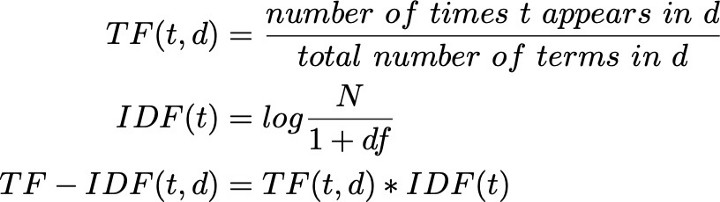

Trong đó:
- t: token (word)
- d: là document
- N: là tổng số documents
- df: là tổng số documents chứa token t

In [31]:
# Ví dụ với scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

data = [
    "About the bird, the bird, bird bird bird",
    "You heard about the bird",
    "The bird is the word"
]

vect = TfidfVectorizer ()
features = vect.fit_transform(data)

print(vect.vocabulary_)
print(features.toarray().round(3))

{'about': 0, 'the': 4, 'bird': 1, 'you': 6, 'heard': 2, 'is': 3, 'word': 5}
[[0.233 0.903 0.    0.    0.361 0.    0.   ]
 [0.42  0.326 0.552 0.    0.326 0.    0.552]
 [0.    0.305 0.    0.517 0.61  0.517 0.   ]]


# 8.Ví dụ thực tế phân tích văn bản

- Bài toán phân tích cảm xúc là một bài toán rất thực tế và nổi tiếng

- Bài toán phân tích tình cảm, cảm xúc ám chỉ đến ý kiến hoặc cảm xúc trong mỗi bài đăng, bài bình luận, bài review,...

## 8.1.Twitter Sentiment Analysis

- Đưa ra các tweet về sáu hãng hàng không của Hoa Kỳ, nhiệm vụ là dự đoán xem một tweet chứa cảm xúc tích cực, tiêu cực hay trung lập về hãng hàng không đó.

- Đây là bài toán supervised learning (học có giám sát). Đưa ra 1 tập các văn bản, ta phân loại (classification) thành các danh mục xác định trước.



### 1.Import thư viện

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import re
import nltk
from nltk.corpus import stopwords


### 2.Phân tích cơ bản dữ liệu

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/text/tweets/Tweets.csv")
data.shape

(14640, 15)

In [34]:
#looking into our data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [35]:
#checking columns in our data
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [36]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [37]:
#checking unique values
data.nunique()

tweet_id                        14484
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3022
user_timezone                      85
dtype: int64

In [38]:
#checking null values in our data
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<AxesSubplot: ylabel='airline'>

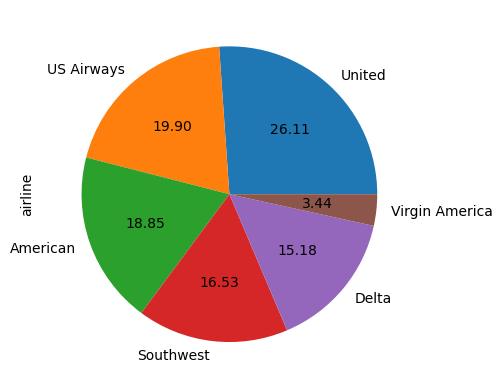

In [39]:
# Đếm xem có bao nhiêu hãng máy bay
data["airline"].value_counts().plot(kind="pie", autopct='%.2f')

<AxesSubplot: ylabel='airline_sentiment'>

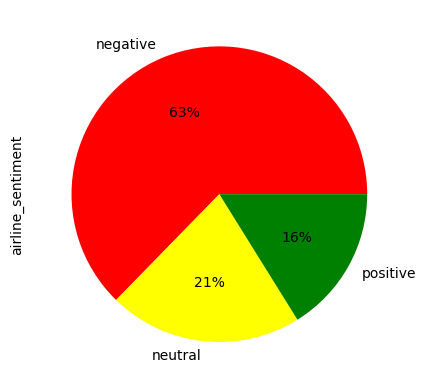

In [40]:
# Đếm xem có bao nhiêu nhãn cảm xúc trong tất cả các tweets
data["airline_sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

**Ta thấy rằng phần lớn các tweet là tiêu cực (63%), tiếp theo là các tweet trung tính (21%) và sau đó là các tweet tích cực (16%).**

Giờ ta vẽ phân phối cảm xúc của mỗi hãng máy bay

<AxesSubplot: xlabel='airline'>

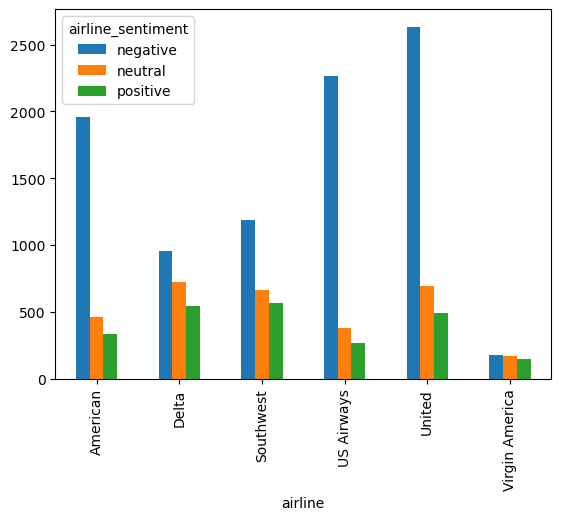

In [41]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

**Kết quả cho thấy rõ ràng rằng đối với hầu hết tất cả các hãng hàng không, phần lớn các tweet là tiêu cực, tiếp theo là các tweet trung lập và tích cực. Virgin America có lẽ là hãng hàng không duy nhất có tỷ lệ ba cảm nhận tương tự nhau.**

### 3.Tiền xử lý dữ liệu

Tweet chứa nhiều từ lóng và dấu chấm câu. Ta cần làm sạch chúng trước khi dùng cho model.

Đầu tiên, ta chia dữ liệu thành features (đầu vào) và labels (nhãn - đầu ra).

- features: chỉ gồm các tweets
- labels: chỉ gồm các các cảm xúc (sentiment)



In [42]:
features = data["text"].values
labels = data["airline_sentiment"].values
print(f"Feature: {features[2]}, Label: {labels[0]}")

Feature: @VirginAmerica I didn't today... Must mean I need to take another trip!, Label: neutral


**Vì label hiện tại đang ở dạng text. Ta cần biến chúng về dạng số, ta có thể dùng LabelEncoder để làm việc này.**

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels_text = data["airline_sentiment"].values
labels = encoder.fit_transform(labels_text)

print(encoder.classes_)
print(f"Text-label: {labels_text[:5]}, Number-Label:{labels[:5]}")

['negative' 'neutral' 'positive']
Text-label: ['neutral' 'positive' 'neutral' 'negative' 'negative'], Number-Label:[1 2 1 0 0]


**Chia data thành tập train và test. Với 20% dữ liệu là cho tập test.**

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11712 11712
2928 2928


**Sử dụng Bag-of-Words để tạo features. Nhớ là fit trên tập train và apply trên tập test.**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 0 ... 0 0 0]] 13267


### 4.Xây dựng models

- Khi bài toán đã ở dạng supervised learning, có thể dùng rất nhiều models khác nhau trong scikit-learn để thực nghiệm

#### 4.1.Logistic Regression

/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.798155737704918


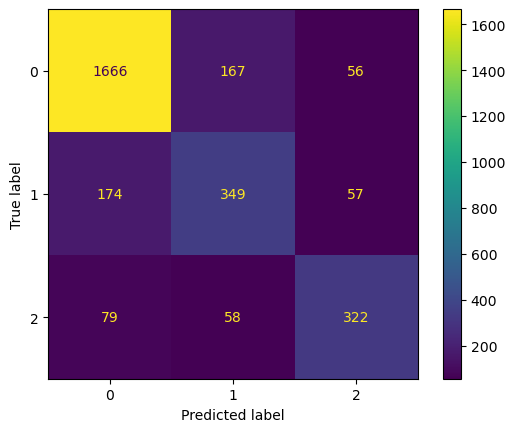

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

**Ta có thể thấy, độ chính xác vẫn còn thấp, thuật toán chạy chậm vì số lượng features quá lớn: 13267. Chúng ta có thể giảm số lượng features để thuật toán học nhanh hơn**.

- Thiết lập tham số max_features=1000 trong lúc tạo đối tượng CountVectorizer. Tuy nhiên cách này sẽ mất đi nhiều từ có ý nghĩa trong từ điển.
- Thiết lập tham số stop_words=["english"] trong lúc tạo đối tượng CountVectorizer. Sẽ loại bỏ những stop-words. Tuy nhiên với bài toán này, những tweet do người dùng tạo ra thường có ít stop-words --> Không hiệu quả cho bài toán này.
- Sử dụng các kĩ thuật tiền xử lý text trước khi CountVectorizer ví dụ như: Stemming, Lemmatizing, và Stop Words
- Có thể sử dụng features tạo ra bởi mô hình TF-IDF thay vì Bag-of-Words.
- Sử dụng các giải thuật khác nhau, và tối ưu hóa tham số cho từng giải thuật đó.



In [47]:
# instantiate the vectorizer
vect = CountVectorizer(max_features=5000)
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 0 ... 0 0 0]] 5000


/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.8008879781420765


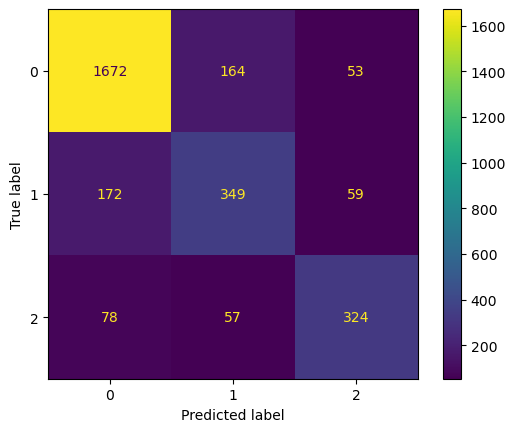

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

#### 4.2.Random Forest

Accuracy:0.7773224043715847


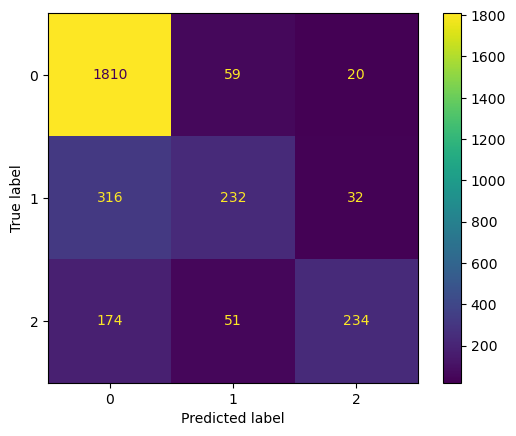

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

In [50]:
# Đưa ra thông tin báo cáo về kết quả phân loại
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1889
           1       0.68      0.40      0.50       580
           2       0.82      0.51      0.63       459

    accuracy                           0.78      2928
   macro avg       0.76      0.62      0.67      2928
weighted avg       0.77      0.78      0.76      2928



**Kết quả vẫn rất kém, ta sẽ dùng features được tạo ra bởi TfidfVectorizer trong scikit-learn**


#### TF-IDF features

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer
vect = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.9, stop_words="english")
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_tfidf = vect.transform(x_train).toarray()
x_test_tfidf = vect.transform(x_test).toarray()

print(x_train_tfidf[:1], len(x_train_tfidf[0]))

[[0. 0. 0. ... 0. 0. 0.]] 2439


#### Random Forest Again

Accuracy:0.7612704918032787


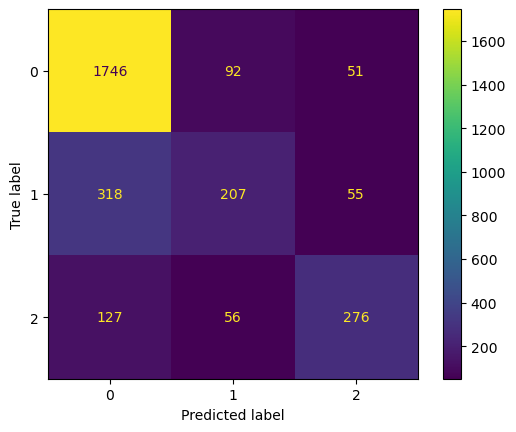

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train_tfidf, y_train)

#predicting output for test data
pred = model.predict(x_test_tfidf)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_tfidf, y_test)


## Cải tiến features với thư viên nltk

Ta chỉnh sửa lại hàm clean_features và sử dụng thư viện nltk

In [53]:
features = data["text"].values
labels = data["airline_sentiment"].values
print(f"Feature: {features[2]}, Label: {labels[0]}")

Feature: @VirginAmerica I didn't today... Must mean I need to take another trip!, Label: neutral


Viết hàm tiền xử lý dữ liệu với nltk và RegEx.

In [54]:
## Dùng thư viên nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")

stemmer_obj = PorterStemmer()
lemmatizer_obj = WordNetLemmatizer()
list_stop_words_obj = set(stopwords.words("english"))


def clean_features_nltk(features, stemmer, lemmatizer, list_stop_words):
    clean_features = []
    for sentence in range(0, len(features)):
        # Xóa các ký tự đặc biệt
        sentence = re.sub(r'\W', ' ', str(features[sentence]))

        # Xóa các chữ cái riêng lẻ
        sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)

        # Xóa các chữ cái bắt đầu ở đầu câu
        sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', sentence)

        # Thay thế nhiều khoảng trắng thành 1 khoảng trắng
        sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

        # Xóa các tiền tố bắt đầu bằng chữ 'b' (Text ở dạng byte sẽ có chữ b ở đầu)
        sentence = re.sub(r'^b\s+', '', sentence)

        # Chuyển hết thành chữ viết thường
        sentence = sentence.lower()

        # Tokenized
        list_words = word_tokenize(sentence)

        # Stemming
        list_words = [stemmer.stem(word) for word in list_words]

        # Lemmatizing
        list_words = [lemmatizer.lemmatize(word) for word in list_words]

        # Clean stopwords
        list_words = [word for word in list_words if (word.casefold() not in list_stop_words)]

        # Join back as sentence
        sentence = " ".join(list_words)

        clean_features.append(sentence)
    return clean_features

features = clean_features_nltk(features, stemmer_obj, lemmatizer_obj, list_stop_words_obj)
print(features[:2])

[nltk_data] Downloading package punkt to /Users/tripercy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tripercy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['virginamerica dhepburn said', 'virginamerica plu ad commerci experi tacki']


In [55]:
# Chia thành train và test
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11712 11712
2928 2928


### 1.Sử dụng CountVectorizer

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer(max_features=5000)
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 0 ... 0 0 0]] 5000


**Ta thấy số lượng features đã giảm đi nhiều, từ 13267 xuống còn 11712. Tuy nhiên ta sẽ lấy 3000 features với tần suất xuất hiện nhiều nhất dùng tham số max_features=3000**

### 2.Xây dựng KNeighbors classification

Accuracy:0.5693306010928961


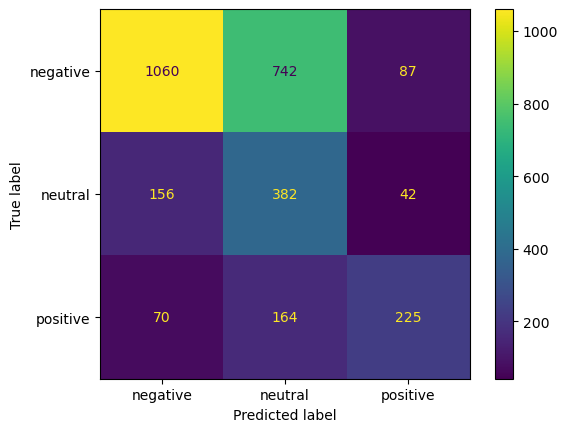

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

**Ta nhận thấy models cho kết quả vẫn rất kém, có thể lý do là trong data train của chúng ta rất thưa, tức là mỗi features có rất nhiều số 0. Do đó ta có thể nghĩ đến việc loại bỏ features thưa đi. Tức là loại bỏ bớt data train vì nó không đem lại giá trị gì cho models cả**

### 3.Loại bỏ bớt data thưa thớt

In [58]:
## Ở đây ví dụ ta chỉ lấy features nào mà có số lượng phần tử khác 0 lớn hơn 10
print(len(x_train_dtm))
selected_idx = (np.count_nonzero(x_train_dtm, axis=1) >= 10)

x_train_dtm = x_train_dtm[selected_idx]
y_train = y_train[selected_idx]
print(len(x_train_dtm))

11712
6500


### 4.Xây dựng lại KNeightbors

Accuracy:0.7100409836065574


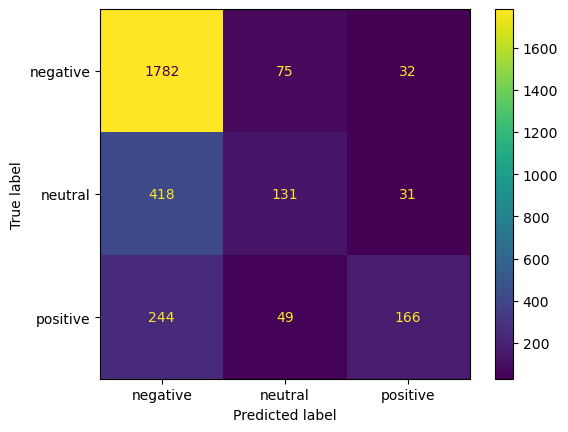

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

**Như có thể thấy sau khi giảm data train từ 11712 xuống còn 6500. Model của chúng ta học với độ chính xác tăng từ 57% lên 71%. Không phải lúc nào data nhiều features để học cũng tốt**

### 5.Xây dựng LogisticRegression

Accuracy:0.7711748633879781


/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


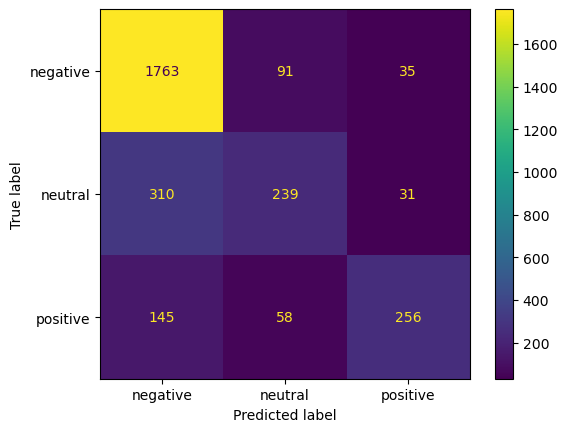

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)


### 6.Xây dựng SVM

Accuracy:0.75


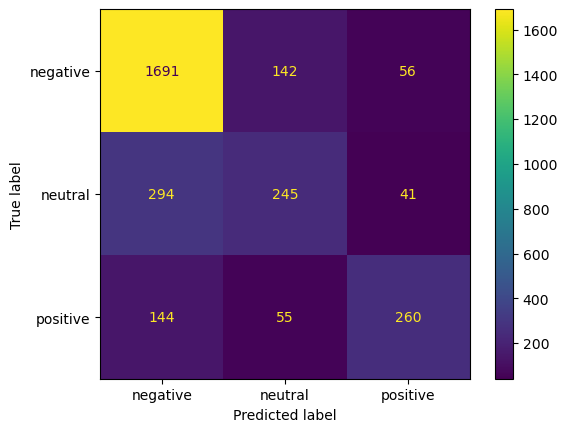

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

model = SVC(kernel='linear', random_state = 10)

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

### Sử dụng TF-IDF features

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer
vect = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.9, stop_words="english")
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_tfidf = vect.transform(x_train).toarray()
x_test_tfidf = vect.transform(x_test).toarray()

print(x_train_tfidf[:1], len(x_train_tfidf[0]))


[[0. 0. 0. ... 0. 0. 0.]] 2066


### 7.Xây dựng MultinomialNaiveBayes

Accuracy:0.7534153005464481


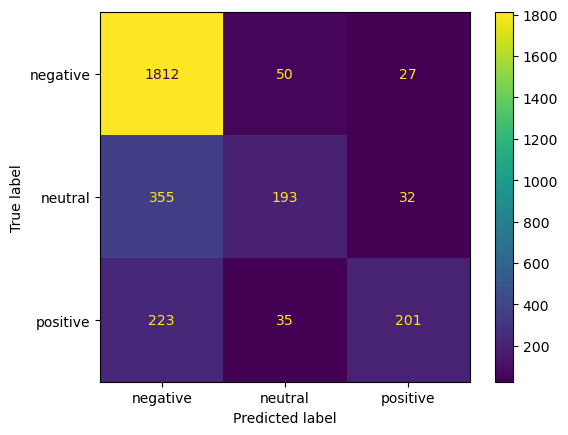

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

model = MultinomialNB()

model.fit(x_train_dtm, y_train)

#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

# References

1. https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
2. https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
3. https://kinder-chen.medium.com/introduction-to-natural-language-processing-tf-idf-1507e907c19
4. https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
5. https://realpython.com/nltk-nlp-python/
6. https://viblo.asia/p/xu-ly-ngon-ngu-tu-nhien-phan-1-OeVKB8eQlkW
7. https://towardsai.net/p/nlp/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0#f0db
8. https://www.mygreatlearning.com/blog/natural-language-processing-tutorial/
9. https://www.twilio.com/blog/2017/12/sentiment-analysis-scikit-learn.html
10. https://medium.com/analytics-vidhya/sentiment-analysis-using-scikit-learn-9adcfd45f6dc
11. https://www.analyticsvidhya.com/blog/2021/02/basics-of-natural-language-processing-nlp-basics/
12. https://vinbigdata.com/phan-tich-du-lieu-van-ban-la-gi-huong-dan-cho-nguoi-moi-bat-dau/
13. https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
14. https://stackabuse.com/text-classification-with-python-and-scikit-learn/
15. https://www.kaggle.com/code/vishalpatil123456/amazon-review-sentimental-analysis
16. https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/working_with_text_data.html
17. https://www.kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn
18. https://regenerativetoday.com/a-complete-sentiment-analysis-project-using-pythons-scikit-learn/


# Bài tập

Áp dụng các kĩ thuật tiền xử lý dữ liệu text và lựa chọn các mô hình học máy để áp dụng vào bài toán phân tích văn bản:


* ML Dataset, có thể tìm dataset  trong này:
https://github.com/thieu1995/csv-files/tree/main/data/text
và
https://github.com/sreeram004/Machine-Learning

* Một số bài toán ví dụ:

1. Phân tích cảm xúc người đánh giá trên tập dữ liệu IMDB.

2. Xây dựng mô hình phát hiện spam Youtube.

3. Phân tích cảm xúc dựa trên review sản phẩm của Amazon
(Data nhỏ có thể lấy ở đây: https://github.com/thieu1995/csv-files/tree/main/data/text/amazon-review)

4. Email spam detection model

5. Fake news detection model





